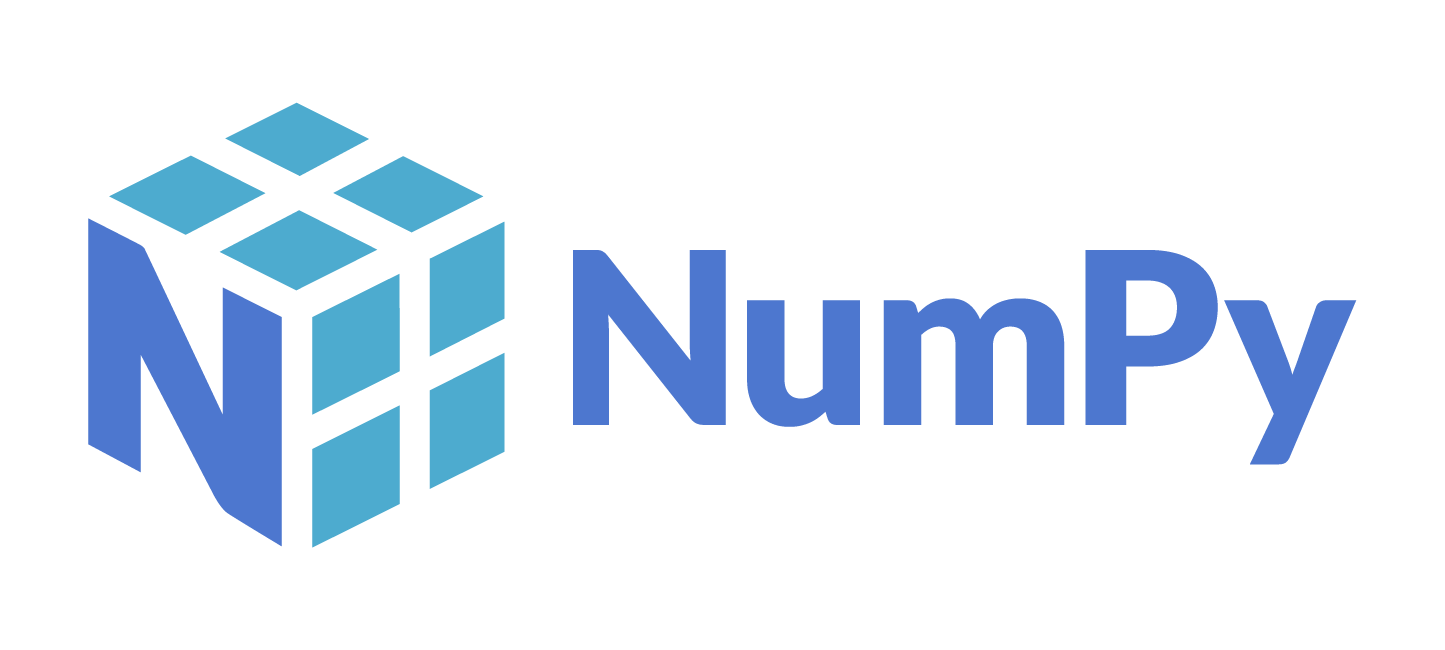

In [1]:
from IPython.display import Image
Image("imagens/numpylogo.png", width=600)

# NumPy: a base da computação científica no Python

In [2]:
import numpy as np

## O que é a NumPy?

> A computação com arrays é a base para estatística e matemática computacionais, computação científica e suas várias aplicações em ciência e análise de dados, tais como visualização de dados, processamento de sinais digitais, processamento de imagens, bioinformática, aprendizagem de máquina, IA e muitas outras.
>
> A manipulação e a transformação de dados de grande escala dependem de computação eficiente de alta performance com arrays. A linguagem mais escolhida para análise de dados, aprendizagem de máquina e computação numérica produtiva é Python.
>
> Numerical Python (Python Numérico) ou NumPy é a biblioteca em Python padrão para o suporte à utilização de matrizes e arrays  multidimensionais de grande porte, e vem com uma vasta coleção de funções matemáticas de alto nível para operar nestas arrays.
>
> Desde o lançamento do NumPy em 2006, o Pandas apareceu em 2008, e nos últimos anos vimos uma sucessão de bibliotecas de computação com arrays aparecerem, ocupando e preenchendo o campo da computação com arrays. Muitas dessas bibliotecas mais recentes imitam recursos e capacidades parecidas com o NumPy e entregam algoritmos e recursos mais recentes voltados para aplicações de aprendizagem de máquina e inteligência artificial.
>
> A computação com arrays é baseada em estruturas de dados chamadas arrays. Arrays são usadas para organizar grandes quantidades de dados de forma que um conjunto de valores relacionados possa ser facilmente ordenado, obtido, matematicamente manipulado e transformado fácil e rapidamente.
>
> A computação com arrays é única pois envolve operar nos valores de um array de dados de uma vez. Isso significa que qualquer operação de array se aplica a todo um conjunto de valores de uma só vez. Esta abordagem vetorizada fornece velocidade e simplicidade por permitir que os programadores organizem o código e operem em agregados de dados, sem ter que usar laços com operações escalares individuais.

(Fonte: [https://numpy.org](https://numpy.org))

A biblioteca NumPy consiste em:

- objeto `ndarray` (array homogêneo n-dimensional)
- capacidade de **broadcasting**
- funções matemáticas padrão com capacidade de vetorização
- ferramentas para a integração de código C/C++ e Fortran
- álgebra linear, transformadas de Fourier, gerador de números aleatórios

---

### Por que não usar listas?

Uma lista em Python é às vezes vista como equivalente de um *array* em outras linguagens, mas uma lista é mutável e pode conter elementos de tipos diferentes.

Quando uma array de fato contém elementos de um só tipo, temos algumas vantagens:
- Tamanho
- Desempenho
- Funcionalidades específicas

🎈 Link interessante: https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference

#### Alguns exemplos

In [3]:
n = 10_000_000
v = []
w = []
for i in range(n):
    v.append(i)
    w.append(i/10)

In [4]:
type(v), type(w)

(list, list)

In [5]:
%timeit v + w

174 ms ± 154 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
v_np = np.array(v)
w_np = np.array(w)

In [7]:
type(v_np), type(w_np)

(numpy.ndarray, numpy.ndarray)

In [8]:
v_np.dtype, w_np.dtype

(dtype('int64'), dtype('float64'))

In [9]:
v_np.shape

(10000000,)

In [10]:
v_np.size

10000000

In [11]:
v_np.nbytes/v_np.size

8.0

In [12]:
%timeit v_np + w_np

18.6 ms ± 32.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### E o módulo array?

In [13]:
import array

In [14]:
v_arr = array.array('d', v)
w_arr = array.array('d', w)

In [15]:
v_arr.typecode

'd'

In [16]:
%timeit v_arr + w_arr

26.5 ms ± 287 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


🎈 Link interessante: https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65


#### Como isso acontece?

As arrays do NumPy são eficientes porque 
- são compatíveis com as rotinas de álgebra linear escritas em C/C++ ou Fortran
- são *views* de objetos alocados por C/C++, Fortran e Cython
- as operações vetorizadas em geral evitam copiar arrays desnecessariamente

In [17]:
Image(url="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig1_HTML.png", width=600)

*Fonte: Harris et al., "Array Programming with NumPy", Nature volume 585, pages 357–362 (2020)*

<!-- #region tags=["section"] -->
## Vetorização
<!-- #endregion -->

Vetorização é a capacidade de expressar operações em arrays sem especificar o que acontece com cada elemento individual (em outras palavras: sem usar loops!)

- Código vetorizado é mais conciso e legível
- O código fica (ligeiramente) mais parecido com a notação matemática
- Mais rápido (usa operações otimizadas em C/Fortran)


### Vetorização: Exemplo 1

In [18]:
v = np.array([1, 2, 3, 4])

In [19]:
v**2

array([ 1,  4,  9, 16])

In [20]:
np.power(v, 2)

array([ 1,  4,  9, 16])

In [21]:
u = np.array([4.5, 3, 2, 1])

In [22]:
np.dot(u, v) 

np.float64(20.5)

#### Nota: onde estão implementadas as funções do NumPy?

In [23]:
print(np.dot.__doc__)


    dot(a, b, out=None)

    Dot product of two arrays. Specifically,

    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).

    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.

    - If either `a` or `b` is 0-D (scalar), it is equivalent to
      :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
      preferred.

    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.

    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of
      `b`::

        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

    It uses an optimized BLAS library when possible (see `numpy.linalg`).

    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
  

In [24]:
np.info(np.dot)

dot(a, b, out=None)

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to
  :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
  preferred.

- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.

- If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
  sum product over the last axis of `a` and the second-to-last axis of
  `b`::

    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

It uses an optimized BLAS library when possible (see `numpy.linalg`).

Parameters
----------
a : array_like
    First argument.
b : array_like
    Second argument.
out : ndarray, optional
    Output argument. This must have the exact kind that would be re

In [25]:
np.dot?

---


❓❓
- [Código fonte da função `np.dot`](https://github.com/numpy/numpy/blob/master/numpy/core/multiarray.py) - **linha 716**
- [Agora de verdade](https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/methods.c) - **linha 2269**
- [For realz](https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/multiarraymodule.c) - **linha 981 / 1023**


### Cuidado!

In [26]:
sum?

In [27]:
sum(range(5), -1)

9

In [28]:
from numpy import *
sum(range(5), -1)

np.int64(10)

In [29]:
np.sum?

In [30]:
%reset

In [31]:
import numpy as np

---


#### Vetorização: Exemplo 2

In [32]:
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])

In [33]:
A.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [34]:
A.shape

(3, 4)

In [35]:
A.ndim

2

In [36]:
A.reshape((2, 6))

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [37]:
A.reshape((4, 3))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [38]:
A.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [39]:
u = np.random.rand(10)
u

array([0.43961212, 0.49070431, 0.17881541, 0.10581514, 0.23055203,
       0.18895625, 0.65914532, 0.14817145, 0.04337713, 0.46230591])

In [40]:
u.ndim

1

In [41]:
u.shape

(10,)

In [42]:
u.T

array([0.43961212, 0.49070431, 0.17881541, 0.10581514, 0.23055203,
       0.18895625, 0.65914532, 0.14817145, 0.04337713, 0.46230591])

In [43]:
u.T.shape

(10,)

In [44]:
u.T == u

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [45]:
u.T is u

False

In [46]:
np.transpose?

In [47]:
v = u.T
v.base is u

True

In [48]:
u[0] = 0

In [49]:
u

array([0.        , 0.49070431, 0.17881541, 0.10581514, 0.23055203,
       0.18895625, 0.65914532, 0.14817145, 0.04337713, 0.46230591])

In [50]:
v

array([0.        , 0.49070431, 0.17881541, 0.10581514, 0.23055203,
       0.18895625, 0.65914532, 0.14817145, 0.04337713, 0.46230591])

[Documentação para ndarray.base](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.base.html)


#### ❓ (O que são essas dimensões?)

In [51]:
from IPython.display import Image
Image(url="https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png", width=600)

*[Fonte: Elegant SciPy](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html)*


#### Vetorização: Exemplo 3

In [52]:
A[0, :]  

array([1, 2, 3, 4])

In [53]:
A.sum()

np.int64(78)

In [54]:
A.sum(axis=0)

array([15, 18, 21, 24])

In [55]:
A.sum(axis=1)

array([10, 26, 42])

In [56]:
A.size * A.itemsize

96

In [57]:
A.nbytes

96

Novamente:

In [58]:
Image(url="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig1_HTML.png", width=600)

<!-- #region tags=["section"] -->
### Broadcasting
<!-- #endregion -->

Permite fazer operações vetoriais de maneira generalizada.

☠️ **Cuidado!** ☠️

In [59]:
x = np.array([1, 2, 3, 4])

In [60]:
x + 5

array([6, 7, 8, 9])

In [61]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [62]:
x

array([1, 2, 3, 4])

In [63]:
A+x

array([[ 2,  4,  6,  8],
       [ 6,  8, 10, 12],
       [10, 12, 14, 16]])

In [64]:
np.add?

### 📒 Exercícios 


Como determinar a dieta mais econômica que satisfaz os requerimentos nutricionais básicos para boa saúde? Vamos supor que queremos fazer nossa compra semanal no supermercado: leite, miojo e café. Atualmente, os preços são:

- Leite: 4 reais o litro
- Miojo: 1,50 o pacote
- Café: 10 reais a unidade

Vamos nos preocupar com 4 ingredientes nutricionais básicos: proteína, carboidratos e gordura.

| Produto      | Carboidratos | Proteínas | Gorduras|
---------------|--------------|-----------|---------|
|Miojo (100g)  | 63,6g        | 10,0g     | 15,5g   |
|Leite (100ml) | 4,66g        | 3,32g     | 3,35g   |


#### Exercício 1

Use uma ndarray `a` bidimensional que armazene, na posição $(i, j)$, a quantidade de gramas do nutriente $i$ contidas em cada grama do alimento $j$.


#### Solução 1

In [65]:
tabela = np.zeros((3, 2))

In [66]:
miojo = np.array([63.6, 10, 15.5])
leite = np.array([4.66, 3.32, 3.35])

In [67]:
# Para ter os valores nutricionais por grama (ao invés de para cada 100g)
miojo = miojo/100
# Mesma coisa para o leite: vamos obter o valor por ml
leite = leite/100

In [68]:
tabela[:, 0] = miojo

In [69]:
tabela

array([[0.636, 0.   ],
       [0.1  , 0.   ],
       [0.155, 0.   ]])

In [70]:
tabela[:, 1] = leite

In [71]:
tabela

array([[0.636 , 0.0466],
       [0.1   , 0.0332],
       [0.155 , 0.0335]])

#### Solução 2

In [72]:
miojo = np.array([63.6, 10, 15.5])
leite = np.array([4.66, 3.32, 3.35])

In [73]:
tabela = np.vstack([miojo, leite]).T/100

In [74]:
tabela

array([[0.636 , 0.0466],
       [0.1   , 0.0332],
       [0.155 , 0.0335]])

#### Solução 3

In [75]:
tabela = np.stack([miojo, leite], axis=1)/100

In [76]:
tabela

array([[0.636 , 0.0466],
       [0.1   , 0.0332],
       [0.155 , 0.0335]])

#### Exercício 2


A partir da array `a` criada acima, extraia um array que contenha os valores de nutriente por alimento.

In [77]:
carbs = tabela[0, :]
proteina = tabela[1, :]
gordura = tabela[2, :]

In [78]:
carbs.shape, proteina.shape, gordura.shape

((2,), (2,), (2,))

#### Exercício 3


Calcule o preço de uma compra incluindo 2 litros de leite, 1 pacote de café e 5 pacotes de miojo.

Para facilitar, vamos usar a seguinte notação:

$x_0$ -> quantidade de litros de leite;

$x_1$ -> quantidade de pacotes de miojo;

$x_2$ -> quantidade de pacotes de café;

Isso significa que podemos representar a quantidade a ser comprada como:

In [79]:
x = np.array([2, 5, 1])

In [80]:
# Leite: 4 reais o litro
# Miojo: 1,50 o pacote
# Café: 10 reais a unidade
c = np.array([4, 1.5, 10])

Total da compra:

In [81]:
x[0]*c[0] + x[1]*c[1]+x[2]*c[2]

np.float64(25.5)

In [82]:
total = np.dot(c, x)
total

np.float64(25.5)

O custo pode ser calculado, em geral, como

In [83]:
def custo(x):
    c = np.array([4, 1.5, 10])
    return np.dot(x, c)

Assim, se mudamos as quantidades para

10 litros de leite; 8 pacotes de miojo; 2 pacotes de café

temos

In [84]:
custo(np.array([10, 8, 2]))

np.float64(72.0)

---


### Operações vetorizadas e pontos flutuantes

In [85]:
x = np.linspace(-np.pi, np.pi, 10)

In [86]:
x

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

In [87]:
np.sin(x)

array([-1.22464680e-16, -6.42787610e-01, -9.84807753e-01, -8.66025404e-01,
       -3.42020143e-01,  3.42020143e-01,  8.66025404e-01,  9.84807753e-01,
        6.42787610e-01,  1.22464680e-16])

#### ⚠️⚠️ Observação

In [88]:
0 * np.nan

nan

In [89]:
np.nan == np.nan

False

In [90]:
np.inf > np.nan

False

In [91]:
np.nan - np.nan

nan

In [92]:
np.nan in set([np.nan])

True

Observe:

In [93]:
np.array(0) / np.array(0)

/tmp/ipykernel_19339/873513115.py:1: RuntimeWarning: invalid value encountered in divide
  np.array(0) / np.array(0)


np.float64(nan)

In [94]:
np.array(0) // np.array(0)

/tmp/ipykernel_19339/2018018105.py:1: RuntimeWarning: divide by zero encountered in floor_divide
  np.array(0) // np.array(0)


np.int64(0)

In [95]:
np.array([np.nan]).astype(int) #.astype(float)

/tmp/ipykernel_19339/1946231171.py:1: RuntimeWarning: invalid value encountered in cast
  np.array([np.nan]).astype(int) #.astype(float)


array([-9223372036854775808])

In [96]:
0.3 == 3 * 0.1

False

**Nunca teste se um número real é igual a outro! Use sempre tolerâncias.**

In [97]:
np.abs(0.3 - 3*0.1)

np.float64(5.551115123125783e-17)

#### Explicação


- `NaN` : *Not a Number*
- `Inf` : Infinito?

In [98]:
for dtype in [np.int8, np.int32, np.int64]:
   print(np.iinfo(dtype).min)
   print(np.iinfo(dtype).max)

-128
127
-2147483648
2147483647
-9223372036854775808
9223372036854775807


In [99]:
for dtype in [np.float32, np.float64]:
   print(np.finfo(dtype).min)
   print(np.finfo(dtype).max)
   print(np.finfo(dtype).eps)

-3.4028235e+38
3.4028235e+38
1.1920929e-07
-1.7976931348623157e+308
1.7976931348623157e+308
2.220446049250313e-16


In [100]:
np.finfo(np.float64).max+1.e308

/tmp/ipykernel_19339/1273613367.py:1: RuntimeWarning: overflow encountered in scalar add
  np.finfo(np.float64).max+1.e308


np.float64(inf)

Leia mais na documentação oficial do Python: https://docs.python.org/pt-br/3/tutorial/floatingpoint.html

In [101]:
x = np.arange(0, 10*np.pi, np.pi)

In [102]:
np.sin(x) == 0

array([ True, False, False, False, False, False, False, False, False,
       False])

In [103]:
np.allclose(np.sin(x), np.zeros(np.shape(x)))

True

---


### Basic Indexing, Advanced (Fancy) Indexing

In [104]:
x = np.arange(10)
x[2:5]

array([2, 3, 4])

In [105]:
x[:-7]

array([0, 1, 2])

In [106]:
x[1:7:2]

array([1, 3, 5])

In [107]:
y = np.arange(35).reshape(5,7)
y[1:5:2,::3]

array([[ 7, 10, 13],
       [21, 24, 27]])

As arrays do NumPy podem ser indexadas por outras arrays (ou qualquer outro objeto tipo-sequência que possa ser convertido para uma array, como listas, com a exceção de tuplas). No entanto, isso pode não ser tão eficiente pois ativa o [indiciamento avançado](https://numpy.org/devdocs/reference/arrays.indexing.html#advanced-indexing).

In [108]:
x = np.arange(10,1,-1)

In [109]:
x[np.array([3,3,-3,8])]

array([7, 7, 4, 2])

In [110]:
x[np.array([[1,1],[2,3]])]

array([[9, 9],
       [8, 7]])

Também podemos usar máscaras booleanas:

In [111]:
b = y>20

In [112]:
y[b]

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [113]:
x = np.arange(30).reshape(2,3,5)

In [114]:
b = np.array([[True, True, False], [False, True, True]])
x[b]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [115]:
x = np.arange(5)
x[:,np.newaxis] + x[np.newaxis,:]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [116]:
z = np.arange(81).reshape(3,3,3,3)
z[1,...,2]

array([[29, 32, 35],
       [38, 41, 44],
       [47, 50, 53]])

In [117]:
z[1,:,:,2]

array([[29, 32, 35],
       [38, 41, 44],
       [47, 50, 53]])

### Exercícios


#### Criar um array aleatório de tamanho 12 e substituir o menor valor por -999.

In [118]:
aleatorio = np.random.random(12)
aleatorio[aleatorio.argmax()] = -999
aleatorio

array([ 8.37846566e-01, -9.99000000e+02,  2.43672256e-01,  7.64456955e-01,
        1.01621485e-01,  6.34192781e-01,  2.84714950e-01,  6.01713572e-01,
        2.24672594e-01,  2.92966223e-01,  3.21318674e-01,  7.18568189e-01])

#### Ordenar uma array pela n-ésima coluna

In [119]:
vetor = np.random.randint(0,10,(3,3))
vetor

array([[6, 3, 5],
       [0, 7, 1],
       [3, 7, 4]])

In [120]:
vetor[vetor[:,1].argsort()]

array([[6, 3, 5],
       [0, 7, 1],
       [3, 7, 4]])

#### Como saber se uma array 2D tem colunas nulas?

In [121]:
z = np.random.randint(0,3,(3,10))
z

array([[2, 2, 0, 2, 0, 1, 0, 0, 2, 2],
       [1, 1, 1, 0, 2, 1, 2, 2, 2, 1],
       [1, 0, 1, 0, 0, 0, 2, 0, 0, 1]])

In [122]:
(~z.any(axis=0)).any()

np.False_

In [123]:
z[:, 0] = np.zeros(3)
z

array([[0, 2, 0, 2, 0, 1, 0, 0, 2, 2],
       [0, 1, 1, 0, 2, 1, 2, 2, 2, 1],
       [0, 0, 1, 0, 0, 0, 2, 0, 0, 1]])

In [124]:
(~z.any(axis=0)).any()

np.True_

#### Trocar duas linhas de uma matriz

In [125]:
A = np.arange(25).reshape(5,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [126]:
A[[0,1]] = A[[1,0]]
A

array([[ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

### 2.4 Submódulos

- `numpy.random` 
- `numpy.fft`
- `numpy.ma`
- `numpy.linalg`
- `numpy.f2py`

In [127]:
print(np.__doc__)


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://numpy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as ``np``::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularly 

---

[Voltar ao notebook principal](00-Tutorial_Python_Sul_2024.md)

[Ir para o notebook Matplotlib](02-Tutorial_Matplotlib.md)